# MLAG Homework 1 - Univariate Linear Regression

Implememt linear regression with one variable to predict profits for a food truck. Given *ex1data1.txt*, the dataset provided by the food truck company, select which city to expand to next by predicting a test set of profits.

ex1data1.txt is a comma-seperated text file that defines:
    * Population of a city, in the first column
    * Profit of a city, in the second column
    
Notes: With linear regression, we have to consider the 5 requirements to use it:
    * Linear Relationship of the data
    * No multi-colinearity
    * Homoscedasticity
    * Normal distribution
    * No auto-correlation

## Problem Start

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("ex1data1.txt", names=["Population", "Profit"])
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Separating the X (independent) and Y (dependent) variables

In [386]:
X_matrix = dataset.iloc[:, [0]]
Y_matrix = dataset.iloc[:, [1]]

### Visualization to check linear relationship

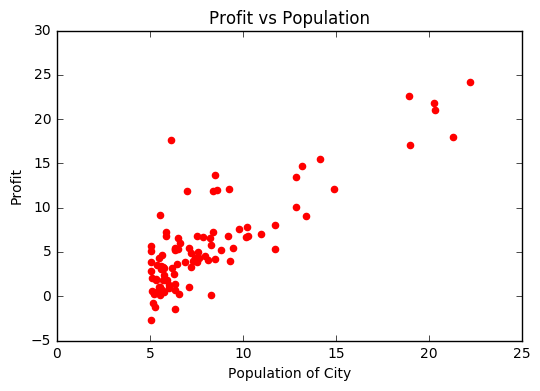

In [4]:
# Plot X_matrix vs Y_matrix to decide if the data has a linear relationship
plt.scatter(X_matrix, Y_matrix, color="red")
plt.xlabel("Population of City") # independent variable
plt.ylabel("Profit") # dependent variable
plt.title("Profit vs Population")
plt.show()

In [5]:
# Get a general idea of the dataset to identify normal distribution, deviation, homoscedasticity
dataset.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Gradient Descent 
The method of finding the parameters that will lead us to a linear best-fit line is gradient descent, a "learning" algorithm used in mathematics to generally minimize functions. The function we want to minimize is the cost function (squared error function), which tells us the error between our proposed hypothesis function and the actual results.

Cost Function:
$$J(θ)= \frac{1}{2m}\sum_{i=1}^m (h(x^i) - y^i)^2$$

Our final gradient descent algorithm will keep changing our parameters based off of the results of the cost function, so that means we need to implement it, as it will be utilized (think: called) multiple times.

In [395]:
# Prerequisite: Convert X_matrix and Y_matrix DataFrame -> ndarray
X_array = X_matrix.values
Y_array = Y_matrix.values

In [126]:
def cost_function(X, Y, theta_parameters):
    ''' m: # of training examples 
        Note: .values does DataFrame -> ndarray '''
    m = dataset.shape[0]
    
    ''' In np.dot, the following are the shapes,
            X_local: (97, 2)
            theta_parameters: (2, 1)
            Result: (97, 1) --> subtract xxby Y_local: (97, 1) '''
    proposed_hypothesis_func = np.dot(X, theta_parameters.T)
    inner_summation = np.power(proposed_hypothesis_func - Y, 2)
    final_cost = inner_summation.sum() / (2 * m)
    return final_cost

### θ.T and 1's Column

In [389]:
''' Array mismatch without 1's column --> (97, 1) dot (2, 1). Add a one's column to X_local (which currently only has
    population) to fix this issue, and allow θ0 to be factored into the cost function. '''
X_matrix.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [390]:
''' After adding a "Filler" column. '''
X_matrix.insert(loc=0, column="Filler", value=1)
X_matrix.head()

,Filler,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [391]:
Y_matrix.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### Computing First Solution of the Cost Function

In [130]:
''' Let's compute the result of the cost function at a hypothetical "iteration #1". According to the homework
    instructions, our result should be 32.07 (when rounded to two decimal places). '''
parameters = np.array([[0, 0]])
cost_function(X_array, Y_array, parameters)

32.072733877455676

### Gradient Descent

In [459]:
def gradient_descent(X, Y, theta_parameters, alpha, iterations):
    ''' Keep changing parameters and track cost function results over each iteration '''
    predicted_parameters = theta_parameters.copy()
    cost_tracking_matrix = np.zeros(iterations)
    m = X.shape[0]
    
    # "Repeat until convergence" -> Manually select a number of iterations
    for i in range(iterations):
        inner_derivative_value = (np.dot(X, theta_parameters.T) - Y)
        for j in range(len(theta_parameters.ravel())):
            # X[:, j] is calculated on a per-parameter basis
            complete_inner_value = np.multiply(inner_derivative_value, X[:, j])
            predicted_parameters[0][j] = theta_parameters[0][j] - (alpha * ((1/m) * complete_inner_value.sum()))
        
        theta_parameters = predicted_parameters
        cost[i] = computeCost(X, Y, theta_parameters)
    
    print(cost)
    return theta_parameters

## Choosing an α and iterations value 

In [522]:
# Try changing this to look like mine until it doesn't work
def gradientDescent(X, Y, theta_parameters, alpha, iterations):
    predicted_parameters = np.array([[0.0, 0.0]]) #np.matrix(np.zeros(theta.shape))
    cost_tracking_matrix = np.zeros(iterations)
    
    for i in range(iterations):
        inner_derivative_value = np.dot(X, theta_parameters.T) - y
        
        for j in range(len(theta_parameters.ravel())):
            complete_inner_value = np.multiply(inner_derivative_value, X[:,j])
            print(complete_inner_value)
            predicted_parameters[0][j] = theta_parameters[0][j] - (alpha * (1/len(X) * np.sum(complete_inner_value)))
            
        theta_parameters = predicted_parameters
        cost_tracking_matrix[i] = cost_function(X, y, theta_parameters)
        
    return theta_parameters, cost_tracking_matrix

In [ ]:
X = np.matrix(X_matrix.values)
y = Y_array
theta = np.array([[0,0]])
alpha = 0.01
iters = 1000
theta, cost = gradientDescent(X, y, theta, alpha, iters)

[[-17.592  ]
 [ -9.1302 ]
 [-13.662  ]
 [-11.854  ]
 [ -6.8233 ]
 [-11.886  ]
 [ -4.3483 ]
 [-12.     ]
 [ -6.5987 ]
 [ -3.8166 ]
 [ -3.2522 ]
 [-15.505  ]
 [ -3.1551 ]
 [ -7.2258 ]
 [ -0.71618]
 [ -3.5129 ]
 [ -5.3048 ]
 [ -0.56077]
 [ -3.6518 ]
 [ -5.3893 ]
 [ -3.1386 ]
 [-21.767  ]
 [ -4.263  ]
 [ -5.1875 ]
 [ -3.0825 ]
 [-22.638  ]
 [-13.501  ]
 [ -7.0467 ]
 [-14.692  ]
 [-24.147  ]
 [  1.22   ]
 [ -5.9966 ]
 [-12.134  ]
 [ -1.8495 ]
 [ -6.5426 ]
 [ -4.5623 ]
 [ -4.1164 ]
 [ -3.3928 ]
 [-10.117  ]
 [ -5.4974 ]
 [ -0.55657]
 [ -3.9115 ]
 [ -5.3854 ]
 [ -2.4406 ]
 [ -6.7318 ]
 [ -1.0463 ]
 [ -5.1337 ]
 [ -1.844  ]
 [ -8.0043 ]
 [ -1.0179 ]
 [ -6.7504 ]
 [ -1.8396 ]
 [ -4.2885 ]
 [ -4.9981 ]
 [ -1.4233 ]
 [  1.4211 ]
 [ -2.4756 ]
 [ -4.6042 ]
 [ -3.9624 ]
 [ -5.4141 ]
 [ -5.1694 ]
 [  0.74279]
 [-17.929  ]
 [-12.054  ]
 [-17.054  ]
 [ -4.8852 ]
 [ -5.7442 ]
 [ -7.7754 ]
 [ -1.0173 ]
 [-20.992  ]
 [ -6.6799 ]
 [ -4.0259 ]
 [ -1.2784 ]
 [ -3.3411 ]
 [  2.6807 ]
 [ -0.29678]
 [ -3.8845 ]

In [492]:
type(X_array)

numpy.ndarray

In [493]:
type(np.matrix(X_matrix.values))

numpy.matrixlib.defmatrix.matrix

In [496]:
d = X_matrix.values

In [514]:
d[:, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])